### Beginner Level

1. How do you read a CSV file into a pandas DataFrame?
2. What's the difference between loc and iloc in pandas?
3. How do you select all rows where column 'A' has values greater than 10?
4. How do you find and handle missing values in a DataFrame?
5. How would you create a new column based on values from existing columns?
6. Write code to get basic statistics (mean, median, etc.) for numeric columns.
7. How do you sort a DataFrame by values in a specific column?
8. How do you reset the index of a DataFrame?
9. How do you rename columns in a DataFrame?
10. How do you drop rows or columns from a DataFrame?


In [1]:
import pandas as pd
import numpy as np

## Common Encoding Types

| Encoding       | Use Case |
|---------------|---------|
| `utf-8` (default)  | Supports most characters, best for general use. |
| `latin-1`         | Useful when `utf-8` fails, works for many European languages. |
| `ISO-8859-1`      | Similar to `latin-1`, handles Western European characters. |
| `windows-1252`    | Used in Windows environments for Western European languages. |
| `utf-16` / `utf-32` | Used for files with special characters (e.g., Chinese, Japanese). |

In [2]:
# Basic way to read a CSV file
df = pd.read_csv('data.csv')

In [3]:
# Read with specific options
# sep=',',                 Specify delimiter
# header=0,                Use first row as column names
# index_col='id_column',   Set a specific column as index
# na_values=['NA', 'N/A'], Custom NA values
# nrows=1000               Only read first 1000 rows
df = pd.read_csv('data.csv',
                 encoding = 'ISO-8859-1',
                 sep=',',                 # Specify delimiter
                 header=0,                # Use first row as column names
                 nrows=1000)              # Only read first 1000 rows
df.head(4)

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4


## Difference Between `.loc[]` and `.iloc[]`

| Feature            | `.loc[]` (Label-based)                                    | `.iloc[]` (Index-based)                         |
|--------------------|---------------------------------------------------------|------------------------------------------------|
| **Selection Type** | Selects rows/columns based on labels (row/column names). | Selects rows/columns based on integer positions (like list indexing). |
| **Index Type**     | Works with string labels, numerical labels, or boolean indexing. | Works only with integer indices (starting from `0`). |
| **Slicing Behavior** | Includes both start and end index. | Excludes the end index (like Python list slicing). |
| **Use Case**       | When you know row/column labels. | When you want to select by position. |


In [4]:
print(df.head(4))
ans = df.iloc[0:3,0:2]
print(ans)


   Duration          Date  Pulse  Maxpulse  Calories
0        60  '2020/12/01'    110       130     409.1
1        60  '2020/12/02'    117       145     479.0
2        60  '2020/12/03'    103       135     340.0
3        45  '2020/12/04'    109       175     282.4
   Duration          Date
0        60  '2020/12/01'
1        60  '2020/12/02'
2        60  '2020/12/03'


In [5]:
df = df.set_index(pd.RangeIndex(start=0, stop=len(df))) # set_index is used to set the index value in the table
df.columns = df.columns.str.strip() # Removing the extra spaces from the label names
print(df.head(4))
ans1 =  df.loc[0:2,'Duration':'Pulse']
print(ans1)

   Duration          Date  Pulse  Maxpulse  Calories
0        60  '2020/12/01'    110       130     409.1
1        60  '2020/12/02'    117       145     479.0
2        60  '2020/12/03'    103       135     340.0
3        45  '2020/12/04'    109       175     282.4
   Duration          Date  Pulse
0        60  '2020/12/01'    110
1        60  '2020/12/02'    117
2        60  '2020/12/03'    103


In [6]:
# Solution 3 selecting the values in the any columns where value < 250
ans = df[df['Calories'] < 250]
ans

,Duration,Date,Pulse,Maxpulse,Calories
8,30,'2020/12/09',109,133,195.1
16,60,'2020/12/16',98,120,215.2
20,45,'2020/12/20',97,125,243.0
24,45,'2020/12/24',105,132,246.0
27,60,'2020/12/27',92,118,241.0
31,60,'2020/12/31',92,115,243.0


In [7]:
# Solution 4 Find and handel missing value in the data frame
# Finding the nan values in the data frame
nun_count = df.isna().sum()
print(nun_count)
print(df.dtypes)


# Handle missing values
df_dropped = df.dropna()                            # Drop rows with any missing values
df_dropped_cols = df.dropna(axis=1)                 # Drop columns with any missing values
df_filled = df.fillna(0)                            # Fill missing values with 0
df_ffill = df.fillna(method='ffill')                # Forward fill
df_mean = df.apply(lambda col : col.fillna(col.mean()) if col.dtype in ['int64','float64'] else col) # Checking all columns wise mean value
# df_mean = df.fillna(df.mean(),inplace = True)     # Fill with column means
print(df_mean.head(4))

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64
Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object
   Duration          Date  Pulse  Maxpulse  Calories
0        60  '2020/12/01'    110       130     409.1
1        60  '2020/12/02'    117       145     479.0
2        60  '2020/12/03'    103       135     340.0
3        45  '2020/12/04'    109       175     282.4


C:\Users\Aman\AppData\Local\Temp\ipykernel_24812\800047626.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')                # Forward fill


In [8]:
df.columns

Index(['Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [9]:
# Creating new columns based on existing values
a = df['Calories'].min()
b = df['Calories'].mean() - 100
c = df['Calories'].mean() + 100
d = df['Calories'].max()
df['Healthy'] = pd.cut(
    df['Calories'],
    bins = [50,450,650,1250],
    labels=['Low', 'Medium', 'High']
)
print(df.head(10))

   Duration          Date  Pulse  Maxpulse  Calories Healthy
0        60  '2020/12/01'    110       130     409.1     Low
1        60  '2020/12/02'    117       145     479.0  Medium
2        60  '2020/12/03'    103       135     340.0     Low
3        45  '2020/12/04'    109       175     282.4     Low
4        45  '2020/12/05'    117       148     406.0     Low
5        60  '2020/12/06'    102       127     300.0     Low
6        60  '2020/12/07'    110       136     374.0     Low
7       450  '2020/12/08'    104       134     253.3     Low
8        30  '2020/12/09'    109       133     195.1     Low
9        60  '2020/12/10'     98       124     269.0     Low


In [10]:
# Write code to get basic statistics (mean, median, etc.) for numeric columns.
# For Calories
mean = df['Calories'].mean()                # Mean
median = df['Calories'].median()            # Median
value_count = df['Calories'].value_counts() # Value counts
std_dev = df['Calories'].std()              # Standard Deviation

In [11]:
# How do you sort a DataFrame by values in a specific column?
df_ascending = df.sort_values(by='Calories')
df_descending = df.sort_values(by = 'Calories', ascending = False)

In [12]:
# How do you reset the index of a DataFrame?
# Reset index (make old index a column)
df_reset_ind = df.reset_index()
print(df_reset_ind.head(3))

# Reset index (drop old index)
df_reset_ind = df.reset_index(drop = True)
print(df_reset_ind.head(3))

# Reset index after operations like filtering
Filtered_data = df[df['Calories'] < 300]
Filtered_data = Filtered_data.reset_index(drop = True)
Filtered_data.head(10)

   index  Duration          Date  Pulse  Maxpulse  Calories Healthy
0      0        60  '2020/12/01'    110       130     409.1     Low
1      1        60  '2020/12/02'    117       145     479.0  Medium
2      2        60  '2020/12/03'    103       135     340.0     Low
   Duration          Date  Pulse  Maxpulse  Calories Healthy
0        60  '2020/12/01'    110       130     409.1     Low
1        60  '2020/12/02'    117       145     479.0  Medium
2        60  '2020/12/03'    103       135     340.0     Low


,Duration,Date,Pulse,Maxpulse,Calories,Healthy
0,45,'2020/12/04',109,175,282.4,Low
1,450,'2020/12/08',104,134,253.3,Low
2,30,'2020/12/09',109,133,195.1,Low
3,60,'2020/12/10',98,124,269.0,Low
4,60,'2020/12/12',100,120,250.7,Low
5,60,'2020/12/12',100,120,250.7,Low
6,60,'2020/12/15',98,123,275.0,Low
7,60,'2020/12/16',98,120,215.2,Low
8,45,'2020/12/20',97,125,243.0,Low
9,45,NaN,100,119,282.0,Low


In [13]:
# Using list to assign the new column names
df.columns = ['Duration', 'Date', 'Pulse', 'MaxPulse', 'Calories', 'Healthy']
print(df.head(5))

# Using rename
df_renamed = df.rename(columns = {'Pulse' : 'Heart_Rate'})
print(df_renamed.head(4))

   Duration          Date  Pulse  MaxPulse  Calories Healthy
0        60  '2020/12/01'    110       130     409.1     Low
1        60  '2020/12/02'    117       145     479.0  Medium
2        60  '2020/12/03'    103       135     340.0     Low
3        45  '2020/12/04'    109       175     282.4     Low
4        45  '2020/12/05'    117       148     406.0     Low
   Duration          Date  Heart_Rate  MaxPulse  Calories Healthy
0        60  '2020/12/01'         110       130     409.1     Low
1        60  '2020/12/02'         117       145     479.0  Medium
2        60  '2020/12/03'         103       135     340.0     Low
3        45  '2020/12/04'         109       175     282.4     Low


In [17]:
print(df.columns)
df_drop_cols = df.drop(columns=['MaxPulse', 'Pulse'])
# Alternative: df_drop_cols = df.drop(['B', 'D'], axis=1)

# Drop rows by index
df_drop_rows = df.drop(index=[1, 3])
# Alternative for older pandas: df_drop_rows = df.drop([1, 3])

# Drop rows based on a condition
df_drop_condition = df[~(df['Calories'] > 300)]  # Drop rows where A > 3

Index(['Duration', 'Date', 'Pulse', 'MaxPulse', 'Calories', 'Healthy'], dtype='object')


## Intermediate Level

1. How do you perform a groupby operation with multiple aggregation functions?
2. What's the difference between merge, join, and concat in pandas?
3. Explain and demonstrate how to pivot a DataFrame.
4. How do you handle duplicate values in a DataFrame?
5. How would you convert a wide DataFrame to a long format (and vice versa)?
6. Write code to resample time series data to a different frequency.
7. How do you apply a custom function to every row or column in a DataFrame?
8. Explain the concept of boolean indexing with multiple conditions.
9. How do you handle categorical data in pandas?
10. How would you create a rolling window calculation?


In [18]:
# How do you perform a groupby operation with multiple aggregation functions?
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A', 'C', 'C', 'B'],
    'Value1': [10, 15, 12, 18, 9, 22, 25, 16],
    'Value2': [100, 150, 120, 180, 90, 220, 250, 160]
})
print(df.head(5))

# Simple groupby with multiple aggregations
result1 = df.groupby('Category').agg({
    'Value1' : ['mean','min','max','sum'],
    'Value2' : ['mean','sum']
})
print(result1)

# Named aggregation
result2 = df.groupby('Category').agg(
    v1_sum = ('Value1','sum'),
    v1_max = ('Value1','max'),
    v2_sum = ('Value2','mean')
)
print(result2)

  Category  Value1  Value2
0        A      10     100
1        B      15     150
2        A      12     120
3        B      18     180
4        A       9      90
             Value1                  Value2     
               mean min max sum        mean  sum
Category                                        
A         10.333333   9  12  31  103.333333  310
B         16.333333  15  18  49  163.333333  490
C         23.500000  22  25  47  235.000000  470
          v1_sum  v1_max      v2_sum
Category                            
A             31      12  103.333333
B             49      18  163.333333
C             47      25  235.000000


In [19]:
# What's the difference between merge, join, and concat in pandas?

import pandas as pd

# Create sample DataFrames
df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'id': [1, 2, 3, 5],
    'age': [25, 30, 35, 40]
})

df3 = pd.DataFrame({
    'dept': ['HR', 'Finance', 'IT'],
    'manager': ['Smith', 'Jones', 'Wilson']
})

# merge - SQL-like join operations on common columns
merged_inner = pd.merge(df1, df2, on='id')  # inner join
merged_left = pd.merge(df1, df2, on='id', how='left')  # left join
merged_right = pd.merge(df1, df2, on='id', how='right')  # right join
merged_outer = pd.merge(df1, df2, on='id', how='outer')  # outer join

# join - joins on indexes by default
df1_indexed = df1.set_index('id')
df2_indexed = df2.set_index('id')
joined = df1_indexed.join(df2_indexed, how='inner')  # join on index

# concat - stacks DataFrames either vertically or horizontally
concat_rows = pd.concat([df1, df1])  # vertical stacking (duplicate rows)
concat_cols = pd.concat([df1, df3], axis=1)  # horizontal stacking (columns)

print("df1:")
print(df1)
print("\ndf2:")
print(df2)
print("\ndf3:")
print(df3)
print("\nMerge (inner join):")
print(merged_inner)
print("\nMerge (left join):")
print(merged_left)
print("\nJoin (on index):")
print(joined)
print("\nConcat (rows):")
print(concat_rows)
print("\nConcat (columns):")
print(concat_cols)


df1:
   id     name
0   1    Alice
1   2      Bob
2   3  Charlie
3   4    David

df2:
   id  age
0   1   25
1   2   30
2   3   35
3   5   40

df3:
      dept manager
0       HR   Smith
1  Finance   Jones
2       IT  Wilson

Merge (inner join):
   id     name  age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35

Merge (left join):
   id     name   age
0   1    Alice  25.0
1   2      Bob  30.0
2   3  Charlie  35.0
3   4    David   NaN

Join (on index):
       name  age
id              
1     Alice   25
2       Bob   30
3   Charlie   35

Concat (rows):
   id     name
0   1    Alice
1   2      Bob
2   3  Charlie
3   4    David
0   1    Alice
1   2      Bob
2   3  Charlie
3   4    David

Concat (columns):
   id     name     dept manager
0   1    Alice       HR   Smith
1   2      Bob  Finance   Jones
2   3  Charlie       IT  Wilson
3   4    David      NaN     NaN


### **📌 Pandas `pivot_table()` - Explanation Table**

| **Parameter**  | **Description** | **Example Usage** |
|---------------|----------------|-------------------|
| `data` | The DataFrame you want to pivot. | `df` |
| `index` | Column(s) to use as row labels (categories). | `index='Region'` |
| `columns` | Column(s) to use as column headers. | `columns='Salesperson'` |
| `values` | Column(s) whose values need to be aggregated. | `values='Sales'` |
| `aggfunc` | Aggregation function (`sum`, `mean`, `count`, etc.). Default = `mean()`. | `aggfunc='sum'` |
| `fill_value` | Value to replace NaN (useful for missing data). | `fill_value=0` |
| `margins` | `True/False` – Adds subtotals for rows and columns. | `margins=True` |
| `margins_name` | Name for subtotals (default = `'All'`). | `margins_name='Total'` |


In [21]:
# Create a "long format" DataFrame
df_long = pd.DataFrame({
    'date': ['2023-01-01', '2023-01-01', '2023-01-01', 
             '2023-01-02', '2023-01-02', '2023-01-02'],
    'product': ['A', 'B', 'C', 'A', 'B', 'C'],
    'sales': [100, 150, 200, 120, 180, 210]
})

# Using pivot to reshape from long to wide
df_pivot = df_long.pivot(index='date', columns='product', values='sales')

# Using pivot_table (handles duplicate entries by aggregating)
df_pivot_table = df_long.pivot_table(
    index='date', 
    columns='product', 
    values='sales',
    aggfunc='sum',  # can also use 'mean', 'count', etc.
    fill_value=0
)

# Multiple value columns with pivot_table
df_long['returns'] = [5, 8, 10, 6, 9, 11]  # Add another value column
df_multi_pivot = df_long.pivot_table(
    index='date',
    columns='product',
    values=['sales', 'returns']
)

print("Original long-format DataFrame:")
print(df_long)
print("\nPivoted DataFrame:")
print(df_pivot)
print("\nPivot table with multiple value columns:")
print(df_multi_pivot)

# Converting back from wide to long with melt
df_melted = df_pivot.reset_index().melt(
    id_vars='date',
    value_vars=['A', 'B', 'C'],
    var_name='product',
    value_name='sales'
)

print("\nBack to long format with melt:")
print(df_melted)

Original long-format DataFrame:
         date product  sales  returns
0  2023-01-01       A    100        5
1  2023-01-01       B    150        8
2  2023-01-01       C    200       10
3  2023-01-02       A    120        6
4  2023-01-02       B    180        9
5  2023-01-02       C    210       11

Pivoted DataFrame:
product       A    B    C
date                     
2023-01-01  100  150  200
2023-01-02  120  180  210

Pivot table with multiple value columns:
           returns             sales              
product          A    B     C      A      B      C
date                                              
2023-01-01     5.0  8.0  10.0  100.0  150.0  200.0
2023-01-02     6.0  9.0  11.0  120.0  180.0  210.0

Back to long format with melt:
         date product  sales
0  2023-01-01       A    100
1  2023-01-02       A    120
2  2023-01-01       B    150
3  2023-01-02       B    180
4  2023-01-01       C    200
5  2023-01-02       C    210


In [22]:
df = pd.DataFrame({
    'id': [1, 2, 3, 2, 1, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'Bob', 'Alice', 'David', 'Eva'],
    'score': [85, 90, 78, 92, 88, 95, 87]
})

# Identify duplicates
duplicates = df.duplicated()  # Boolean mask of duplicate rows
duplicate_rows = df[df.duplicated()]  # Get duplicate rows
duplicate_rows_all = df[df.duplicated(keep=False)]  # All duplicates (not just 2nd+ occurrences)

# Check duplicates in specific columns
duplicate_names = df.duplicated(subset=['name'])  # Duplicated names
duplicate_name_rows = df[df.duplicated(subset=['name'], keep=False)]  # All rows with duplicated names

# Drop duplicates
df_no_duplicates = df.drop_duplicates()  # Keep first occurrence
df_no_duplicates_last = df.drop_duplicates(keep='last')  # Keep last occurrence
df_no_duplicates_names = df.drop_duplicates(subset=['name'])  # Drop based on specific column

# Aggregate duplicates instead of dropping
df_agg = df.groupby('name').agg({
    'id': 'first',  # Keep first id
    'score': 'mean'  # Average scores
}).reset_index()

print("Original DataFrame:")
print(df)
print("\nDuplicate rows (2nd+ occurrences):")
print(duplicate_rows)
print("\nAll rows that have duplicates:")
print(duplicate_rows_all)
print("\nAfter dropping duplicates (keeping first):")
print(df_no_duplicates)
print("\nAfter dropping duplicates by name only:")
print(df_no_duplicates_names)
print("\nAfter aggregating duplicates:")
print(df_agg)

Original DataFrame:
   id     name  score
0   1    Alice     85
1   2      Bob     90
2   3  Charlie     78
3   2      Bob     92
4   1    Alice     88
5   4    David     95
6   5      Eva     87

Duplicate rows (2nd+ occurrences):
Empty DataFrame
Columns: [id, name, score]
Index: []

All rows that have duplicates:
Empty DataFrame
Columns: [id, name, score]
Index: []

After dropping duplicates (keeping first):
   id     name  score
0   1    Alice     85
1   2      Bob     90
2   3  Charlie     78
3   2      Bob     92
4   1    Alice     88
5   4    David     95
6   5      Eva     87

After dropping duplicates by name only:
   id     name  score
0   1    Alice     85
1   2      Bob     90
2   3  Charlie     78
5   4    David     95
6   5      Eva     87

After aggregating duplicates:
      name  id  score
0    Alice   1   86.5
1      Bob   2   91.0
2  Charlie   3   78.0
3    David   4   95.0
4      Eva   5   87.0


In [23]:
# Create a "wide format" DataFrame
df_wide = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie'],
    'math': [90, 85, 82],
    'science': [88, 92, 78],
    'history': [76, 84, 89]
})

# Wide to long using melt
df_long = pd.melt(
    df_wide,
    id_vars=['student'],
    value_vars=['math', 'science', 'history'],
    var_name='subject',
    value_name='score'
)

# Using long to wide with pivot
df_wide_again = df_long.pivot(
    index='student',
    columns='subject',
    values='score'
).reset_index()

# Another example: Multiple measurements over time
df_time_wide = pd.DataFrame({
    'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'temp_morning': [45, 48, 51],
    'temp_noon': [67, 73, 71],
    'temp_evening': [58, 62, 55]
})

# Wide to long for time series
df_time_long = pd.melt(
    df_time_wide,
    id_vars=['date'],
    var_name='measurement',
    value_name='temperature'
)

# Extract time from measurement column
df_time_long['time'] = df_time_long['measurement'].str.replace('temp_', '')
df_time_long = df_time_long.drop('measurement', axis=1)

print("Wide format DataFrame:")
print(df_wide)
print("\nConverted to long format:")
print(df_long)
print("\nConverted back to wide format:")
print(df_wide_again)
print("\nTime series in wide format:")
print(df_time_wide)
print("\nTime series in long format:")
print(df_time_long)

Wide format DataFrame:
   student  math  science  history
0    Alice    90       88       76
1      Bob    85       92       84
2  Charlie    82       78       89

Converted to long format:
   student  subject  score
0    Alice     math     90
1      Bob     math     85
2  Charlie     math     82
3    Alice  science     88
4      Bob  science     92
5  Charlie  science     78
6    Alice  history     76
7      Bob  history     84
8  Charlie  history     89

Converted back to wide format:
subject  student  history  math  science
0          Alice       76    90       88
1            Bob       84    85       92
2        Charlie       89    82       78

Time series in wide format:
         date  temp_morning  temp_noon  temp_evening
0  2023-01-01            45         67            58
1  2023-01-02            48         73            62
2  2023-01-03            51         71            55

Time series in long format:
         date  temperature     time
0  2023-01-01           45  morning
1 

C:\Users\Aman\AppData\Local\Temp\ipykernel_24812\3330847494.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2023-01-01', end='2023-02-01', freq='H')
C:\Users\Aman\AppData\Local\Temp\ipykernel_24812\3330847494.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df.resample('M').mean() # Monthly average
C:\Users\Aman\AppData\Local\Temp\ipykernel_24812\3330847494.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_to_hourly = daily_mean.resample('H').ffill()  # Forward fill
C:\Users\Aman\AppData\Local\Temp\ipykernel_24812\3330847494.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_to_hourly_interp = daily_mean.resample('H').interpolate()  # Interpolate


Original hourly data (first 5 rows):
                        value
timestamp                    
2023-01-01 00:00:00  0.001653
2023-01-01 01:00:00  0.097788
2023-01-01 02:00:00  0.281089
2023-01-01 03:00:00  0.317863
2023-01-01 04:00:00  0.426045

Resampled to daily mean:
               value
timestamp           
2023-01-01  0.724924
2023-01-02 -0.300586
2023-01-03 -0.246650
2023-01-04  0.645879
2023-01-05 -0.774581
2023-01-06  0.416784
2023-01-07  0.082835
2023-01-08 -0.552832
2023-01-09  0.754242
2023-01-10 -0.594076
2023-01-11  0.066887
2023-01-12  0.551840
2023-01-13 -0.831254
2023-01-14  0.663877
2023-01-15 -0.135873
2023-01-16 -0.434710
2023-01-17  0.792515
2023-01-18 -0.684983
2023-01-19  0.340422
2023-01-20  0.229559
2023-01-21 -0.719781
2023-01-22  0.712034
2023-01-23 -0.424947
2023-01-24 -0.116912
2023-01-25  0.644981
2023-01-26 -0.801722
2023-01-27  0.463674
2023-01-28  0.056574
2023-01-29 -0.549708
2023-01-30  0.786510
2023-01-31 -0.624847
2023-02-01 -0.692544

Resampled to

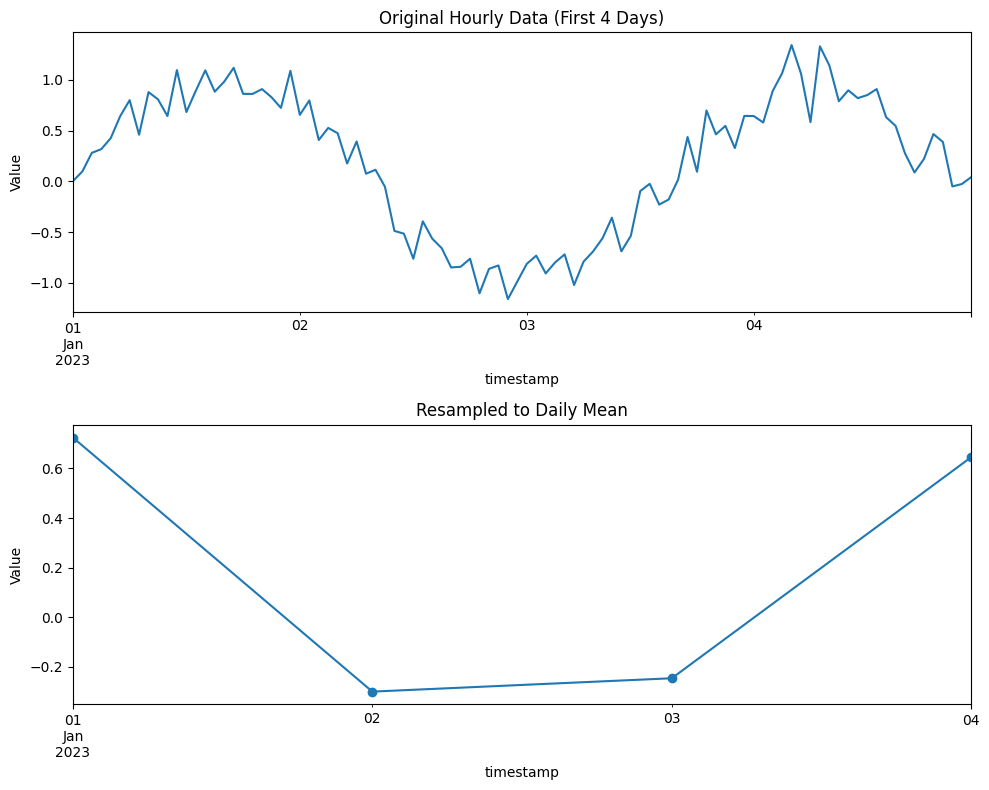

In [24]:
import matplotlib.pyplot as plt

# Create time series data
dates = pd.date_range(start='2023-01-01', end='2023-02-01', freq='H')
df = pd.DataFrame({
    'timestamp': dates,
    'value': np.sin(np.arange(len(dates)) * 0.1) + np.random.normal(0, 0.2, size=len(dates))
})
df.set_index('timestamp', inplace=True)

# Resample to different frequencies
daily_mean = df.resample('D').mean()  # Daily average
daily_sum = df.resample('D').sum()    # Daily sum
weekly_mean = df.resample('W').mean() # Weekly average
monthly_mean = df.resample('M').mean() # Monthly average

# Custom resampling with agg
daily_stats = df.resample('D').agg({
    'value': ['mean', 'min', 'max', 'std']
})

# Downsampling (from higher to lower frequency)
hourly_to_daily = df.resample('D').mean()

# Upsampling (from lower to higher frequency)
daily_to_hourly = daily_mean.resample('H').ffill()  # Forward fill
daily_to_hourly_interp = daily_mean.resample('H').interpolate()  # Interpolate

print("Original hourly data (first 5 rows):")
print(df.head())
print("\nResampled to daily mean:")
print(daily_mean)
print("\nResampled to daily with multiple stats:")
print(daily_stats)
print("\nResampled to weekly mean:")
print(weekly_mean)

# Create a quick plot to visualize
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
df['value'].iloc[:96].plot(ax=ax[0], title='Original Hourly Data (First 4 Days)')
daily_mean['value'].iloc[:4].plot(ax=ax[1], marker='o', title='Resampled to Daily Mean')
for a in ax:
    a.set_ylabel('Value')
plt.tight_layout()
plt.show()

In [25]:
# Create sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
})

# Apply to each column (Series)
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

df_normalized = df.apply(normalize)

# Apply to each row (axis=1)
def row_sum_product(row):
    return row.sum() * row.prod()

df['sum_product'] = df.apply(row_sum_product, axis=1)

# Using lambda functions
df['A_squared'] = df['A'].apply(lambda x: x**2)

# Element-wise operations with applymap (deprecated in newer pandas versions)
df_formatted = df.applymap(lambda x: f"${x:.2f}")

# Using numpy vectorized operations (faster than apply)
df['A_times_B'] = df['A'] * df['B']
df['log_C'] = np.log(df['C'])

# Custom function that uses multiple columns
def complex_calc(row):
    if row['A'] > 3:
        return row['B'] * row['C']
    else:
        return row['B'] + row['C']
        
df['custom_calc'] = df.apply(complex_calc, axis=1)

print("Original DataFrame:")
print(df)
print("\nAfter column normalization:")
print(df_normalized)
print("\nAfter applying row operations:")
print(df[['A', 'B', 'C', 'sum_product', 'A_squared', 'custom_calc']])

Original DataFrame:
   A   B    C  sum_product  A_squared  A_times_B     log_C  custom_calc
0  1  10  100       111000          1         10  4.605170        110.0
1  2  20  200      1776000          4         40  5.298317        220.0
2  3  30  300      8991000          9         90  5.703782        330.0
3  4  40  400     28416000         16        160  5.991465      16000.0
4  5  50  500     69375000         25        250  6.214608      25000.0

After column normalization:
      A     B     C
0  0.00  0.00  0.00
1  0.25  0.25  0.25
2  0.50  0.50  0.50
3  0.75  0.75  0.75
4  1.00  1.00  1.00

After applying row operations:
   A   B    C  sum_product  A_squared  custom_calc
0  1  10  100       111000          1        110.0
1  2  20  200      1776000          4        220.0
2  3  30  300      8991000          9        330.0
3  4  40  400     28416000         16      16000.0
4  5  50  500     69375000         25      25000.0


C:\Users\Aman\AppData\Local\Temp\ipykernel_24812\3417604330.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = df.applymap(lambda x: f"${x:.2f}")


In [26]:
# Create a sample DataFrame
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah'],
    'age': [25, 30, 35, 40, 28, 32, 45, 22],
    'department': ['HR', 'IT', 'Finance', 'IT', 'Marketing', 'Finance', 'HR', 'Marketing'],
    'salary': [60000, 85000, 72000, 90000, 65000, 78000, 70000, 55000]
})

# Simple boolean indexing
it_dept = df[df['department'] == 'IT']

# Multiple conditions with & (AND)
high_salary_hr = df[(df['department'] == 'HR') & (df['salary'] > 65000)]

# Multiple conditions with | (OR)
marketing_or_young = df[(df['department'] == 'Marketing') | (df['age'] < 26)]

# Combining multiple complex conditions
complex_filter = df[
    ((df['department'] == 'IT') & (df['salary'] > 80000)) |
    ((df['department'] == 'Finance') & (df['age'] < 34)) |
    ((df['department'] == 'HR') & (df['salary'] > 65000) & (df['age'] > 40))
]

# Using query method (alternative syntax)
query_result = df.query("department == 'IT' and salary > 80000")

# Using isin for multiple values
finance_or_hr = df[df['department'].isin(['Finance', 'HR'])]

# Negating conditions with ~
not_it = df[~(df['department'] == 'IT')]
# Alternatively: not_it = df[df['department'] != 'IT']

# Using between for range checks
age_range = df[df['age'].between(25, 35)]

print("Original DataFrame:")
print(df)
print("\nIT Department:")
print(it_dept)
print("\nHR with salary > 65000:")
print(high_salary_hr)
print("\nMarketing or age < 26:")
print(marketing_or_young)
print("\nComplex condition result:")
print(complex_filter)
print("\nFinance or HR departments:")
print(finance_or_hr)

Original DataFrame:
      name  age department  salary
0    Alice   25         HR   60000
1      Bob   30         IT   85000
2  Charlie   35    Finance   72000
3    David   40         IT   90000
4      Eva   28  Marketing   65000
5    Frank   32    Finance   78000
6    Grace   45         HR   70000
7   Hannah   22  Marketing   55000

IT Department:
    name  age department  salary
1    Bob   30         IT   85000
3  David   40         IT   90000

HR with salary > 65000:
    name  age department  salary
6  Grace   45         HR   70000

Marketing or age < 26:
     name  age department  salary
0   Alice   25         HR   60000
4     Eva   28  Marketing   65000
7  Hannah   22  Marketing   55000

Complex condition result:
    name  age department  salary
1    Bob   30         IT   85000
3  David   40         IT   90000
5  Frank   32    Finance   78000
6  Grace   45         HR   70000

Finance or HR departments:
      name  age department  salary
0    Alice   25         HR   60000
2  Charli

In [27]:
# Create a DataFrame with categorical data
df = pd.DataFrame({
    'id': range(1, 9),
    'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'High School', 'PhD'],
    'satisfaction': ['Low', 'Medium', 'High', 'Medium', 'High', 'Low', 'Medium', 'High']
})

# Convert to categorical type
df['gender'] = pd.Categorical(df['gender'])
df['education'] = pd.Categorical(df['education'], 
                                 categories=['High School', 'Bachelor', 'Master', 'PhD'],
                                 ordered=True)
df['satisfaction'] = pd.Categorical(df['satisfaction'],
                                   categories=['Low', 'Medium', 'High'],
                                   ordered=True)

# Get category information
gender_categories = df['gender'].cat.categories
education_ordered = df['education'].cat.ordered

# Change categories
df['satisfaction'] = df['satisfaction'].cat.rename_categories({'Low': 'Poor', 'Medium': 'Average', 'High': 'Excellent'})

# Add a new category
df['education'] = df['education'].cat.add_categories(['Post-Doc'])

# Remove unused categories
df['gender'] = df['gender'].cat.remove_unused_categories()

# Convert to codes (integers)
df['education_code'] = df['education'].cat.codes

# One-hot encoding categorical variables
education_dummies = pd.get_dummies(df['education'], prefix='edu')
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')

# Concatenate with original DataFrame
df_with_dummies = pd.concat([df, education_dummies, gender_dummies], axis=1)

print("DataFrame with categorical data:")
print(df)
print("\nGender categories:", gender_categories)
print("Education ordered:", education_ordered)
print("\nEducation as codes:")
print(df[['education', 'education_code']])
print("\nOne-hot encoded DataFrame:")
print(df_with_dummies.iloc[:, :3].join(df_with_dummies.iloc[:, 8:]))

DataFrame with categorical data:
   id gender    education satisfaction  education_code
0   1      M  High School         Poor               0
1   2      F     Bachelor      Average               1
2   3      M       Master    Excellent               2
3   4      F          PhD      Average               3
4   5      M     Bachelor    Excellent               1
5   6      F       Master         Poor               2
6   7      M  High School      Average               0
7   8      F          PhD    Excellent               3

Gender categories: Index(['F', 'M'], dtype='object')
Education ordered: True

Education as codes:
     education  education_code
0  High School               0
1     Bachelor               1
2       Master               2
3          PhD               3
4     Bachelor               1
5       Master               2
6  High School               0
7          PhD               3

One-hot encoded DataFrame:
   id gender    education  edu_PhD  edu_Post-Doc  gender_F  gender

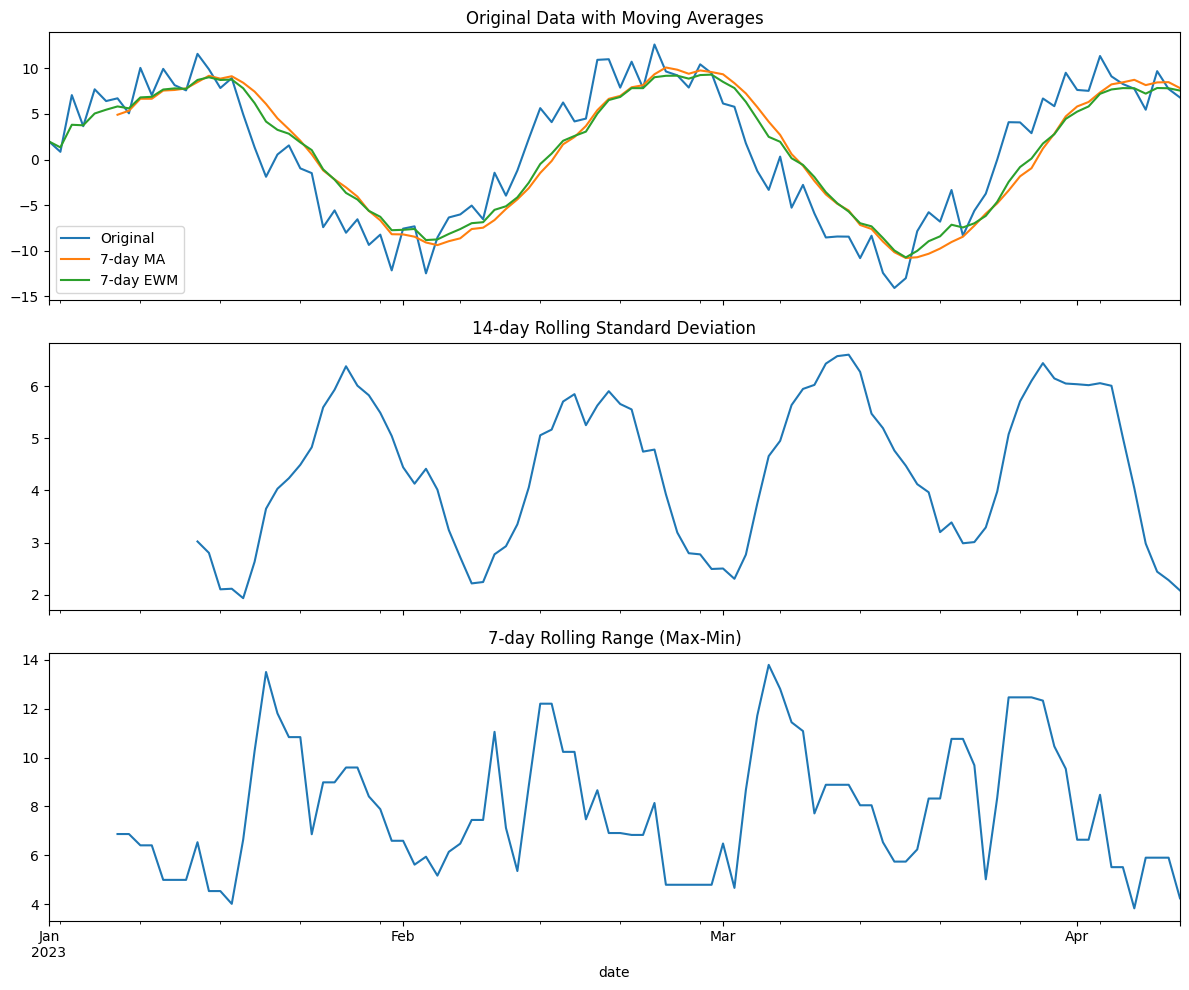

First 10 rows of data:
                value      trend
date                            
2023-01-01   1.984974  10.000000
2023-01-02   0.843781  10.202020
2023-01-03   7.074423  10.404040
2023-01-04   3.658574  10.606061
2023-01-05   7.712976  10.808081
2023-01-06   6.420720  11.010101
2023-01-07   6.721552  11.212121
2023-01-08   5.073050  11.414141
2023-01-09  10.065085  11.616162
2023-01-10   7.073966  11.818182

Rolling 7-day mean (first 10 rows):
date
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
2023-01-07    4.916714
2023-01-08    5.357868
2023-01-09    6.675197
2023-01-10    6.675132
Name: value, dtype: float64

Rolling stats (first 5 rows):
            mean  std  min  max
date                           
2023-01-01   NaN  NaN  NaN  NaN
2023-01-02   NaN  NaN  NaN  NaN
2023-01-03   NaN  NaN  NaN  NaN
2023-01-04   NaN  NaN  NaN  NaN
2023-01-05   NaN  NaN  NaN  NaN


In [28]:
# Create sample time series data
dates = pd.date_range('2023-01-01', periods=100, freq='D')
df = pd.DataFrame({
    'date': dates,
    'value': np.sin(np.linspace(0, 15, 100)) * 10 + np.random.normal(0, 2, 100),
    'trend': np.linspace(10, 30, 100)
})
df.set_index('date', inplace=True)

# Simple rolling window calculations
rolling_mean = df['value'].rolling(window=7).mean()  # 7-day moving average
rolling_std = df['value'].rolling(window=14).std()   # 14-day standard deviation
rolling_min = df['value'].rolling(window=5).min()    # 5-day minimum
rolling_max = df['value'].rolling(window=5).max()    # 5-day maximum

# Multiple statistics at once
rolling_stats = df['value'].rolling(window=7).agg(['mean', 'std', 'min', 'max'])

# Using different window types
rolling_centered = df['value'].rolling(window=7, center=True).mean()  # Centered window
rolling_exponential = df['value'].ewm(span=7).mean()  # Exponential weighted moving average

# Rolling calculations on multiple columns
rolling_corr = df['value'].rolling(window=20).corr(df['trend'])  # Rolling correlation

# Custom rolling function
def rolling_range(x):
    return x.max() - x.min()

rolling_custom = df['value'].rolling(window=7).apply(rolling_range)

# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Original data and simple moving average
df['value'].plot(ax=axes[0], label='Original')
rolling_mean.plot(ax=axes[0], label='7-day MA')
rolling_exponential.plot(ax=axes[0], label='7-day EWM')
axes[0].set_title('Original Data with Moving Averages')
axes[0].legend()

# Rolling standard deviation
rolling_std.plot(ax=axes[1])
axes[1].set_title('14-day Rolling Standard Deviation')

# Custom rolling calculation
rolling_custom.plot(ax=axes[2])
axes[2].set_title('7-day Rolling Range (Max-Min)')

plt.tight_layout()
plt.show()

print("First 10 rows of data:")
print(df.head(10))
print("\nRolling 7-day mean (first 10 rows):")
print(rolling_mean.head(10))
print("\nRolling stats (first 5 rows):")
print(rolling_stats.head(5))

### Advanced Level

1. How do you optimize pandas code for large datasets?
2. Explain and demonstrate the use of MultiIndex in pandas.
3. How would you perform complex time series analysis with pandas?
4. Write code to implement a custom aggregation function with groupby.
5. How do you handle memory management issues with large pandas DataFrames?
6. Demonstrate how to use the pandas eval() and query() methods for performance.
7. How would you implement a sliding window function that requires custom logic?
8. Explain how to use pandas with external data sources (SQL, HDF5, etc.)
9. How would you implement a custom accessor for pandas DataFrames?
10. Demonstrate the use of method chaining for complex data transformations.


### Professional Level

1. How would you debug performance bottlenecks in pandas operations?
2. Implement a custom indexer for specialized data access patterns.
3. Explain the internals of pandas memory usage and how to profile it.
4. How would you implement a custom extension array type?
5. Design a process for handling incremental updates to large pandas DataFrames.
6. Implement a custom vectorized operation that isn't available in pandas.
7. How would you integrate pandas with distributed computing frameworks?
8. Design an ETL pipeline using pandas for a specific industry use case.
9. How would you implement custom serialization/deserialization for pandas objects?
10. Develop strategies for testing pandas code with complex transformations.